In [1]:
import pandas as pd

data = pd.read_csv('rainfall-riverheight-history-Rathnapura.csv')

data.head()

,Date,station,river_hight,rainfall
0,6/14/2024,Putupaula,0.75,1.4
1,6/14/2024,Ellagawa,5.25,0.0
2,6/14/2024,Rathnapura,1.38,0.0
3,6/14/2024,Magura,1.75,0.0
4,6/14/2024,Kalawellawa,2.47,0.0


In [2]:
rathnapura_data = data[data['station'] == 'Putupaula']

# Convert 'Date' to datetime format
rathnapura_data['Date'] = pd.to_datetime(rathnapura_data['Date'])

# Convert 'Date' to datetime format
rathnapura_data['Date'] = pd.to_datetime(rathnapura_data['Date'])

# Check the processed data and look for missing values
rathnapura_data.info(), rathnapura_data.head()

# Filter the data for the "Rathnapura" station and sort by date
rathnapura_data = data[data['station'] == 'Putupaula'].sort_values('Date')


#rename river height column as 'river_height'
rathnapura_data.rename(columns={'river_hight': 'river_height'}, inplace=True)


rathnapura_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 436 entries, 0 to 2105
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         436 non-null    datetime64[ns]
 1   station      436 non-null    object        
 2   river_hight  436 non-null    float64       
 3   rainfall     436 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.0+ KB


C:\Users\Madusanka(MadusankaB\AppData\Local\Temp\ipykernel_7264\1972735815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rathnapura_data['Date'] = pd.to_datetime(rathnapura_data['Date'])
C:\Users\Madusanka(MadusankaB\AppData\Local\Temp\ipykernel_7264\1972735815.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rathnapura_data['Date'] = pd.to_datetime(rathnapura_data['Date'])


,Date,station,river_height,rainfall
290,1/1/2024,Putupaula,0.82,14.2
1370,1/10/2022,Putupaula,1.11,3.7
245,1/10/2024,Putupaula,0.60,0.0
240,1/11/2024,Putupaula,0.43,0.3
235,1/12/2024,Putupaula,0.46,0.0


Matplotlib is building the font cache; this may take a moment.


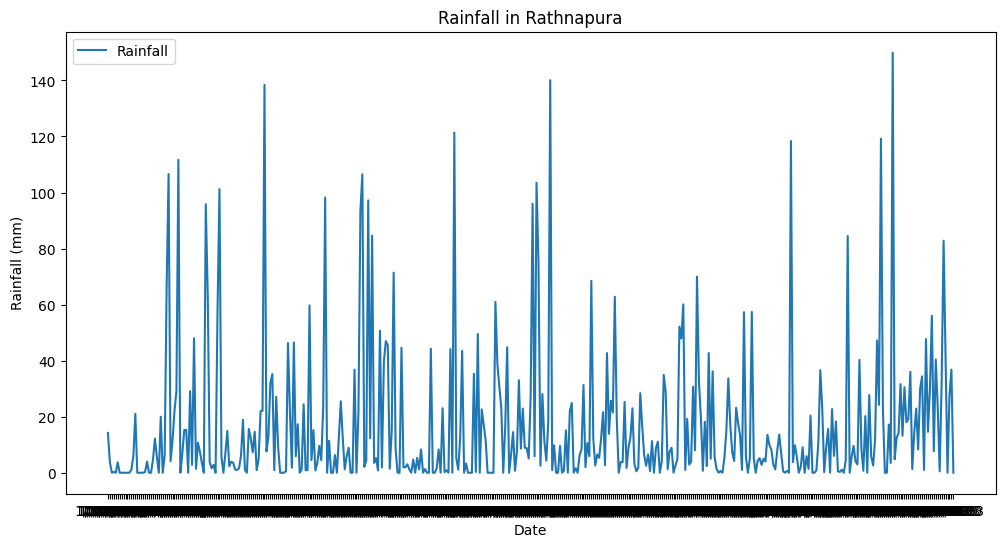

In [3]:



# remove outliers
rathnapura_data = rathnapura_data[rathnapura_data['rainfall'] < 200]

# add rolling mean to missing values
rathnapura_data['rainfall'] = rathnapura_data['rainfall'].fillna(rathnapura_data['rainfall'].rolling(30, min_periods=1).mean())

# #fill missing values with the mean of the monthly rainfall for each month
# rathnapura_data['rainfall'] = rathnapura_data.groupby(rathnapura_data['Date'].dt.month)['rainfall'].transform(lambda x: x.fillna(x.mean()))

# plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rathnapura_data['Date'], rathnapura_data['rainfall'], label='Rainfall')
plt.title('Rainfall in Rathnapura')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

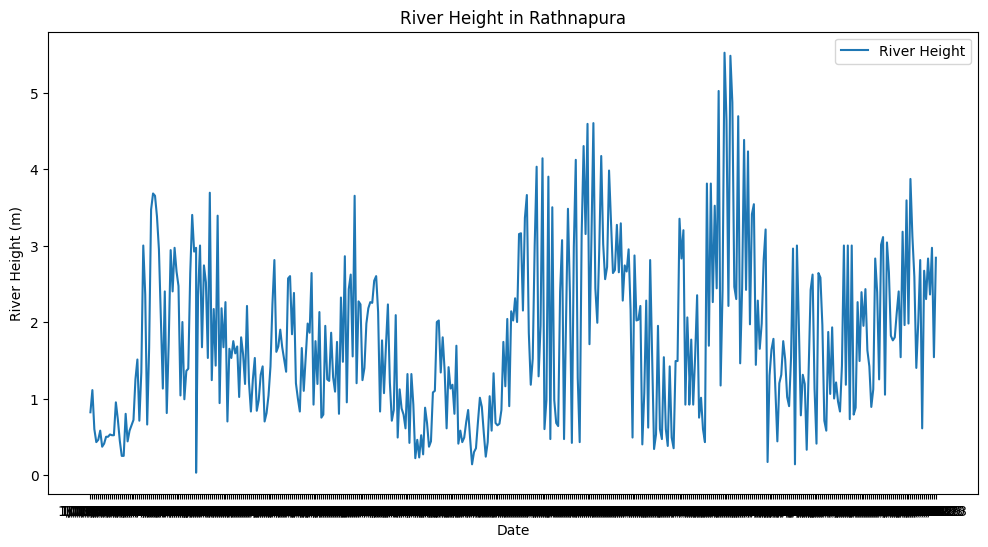

In [4]:
#remove outliers
rathnapura_data = rathnapura_data[rathnapura_data['river_height'] < 10]

#add rolling mean to missing values
rathnapura_data['river_height'] = rathnapura_data['river_height'].fillna(rathnapura_data['river_height'].rolling(30, min_periods=1).mean())


#plot river height
plt.figure(figsize=(12, 6))
plt.plot(rathnapura_data['Date'], rathnapura_data['river_height'], label='River Height')
plt.title('River Height in Rathnapura')
plt.xlabel('Date')
plt.ylabel('River Height (m)')
plt.legend()
plt.show()



In [5]:
# Creating lagged features for river height and rainfall
for lag in range(1, 4):
    rathnapura_data[f'river_height_lag_{lag}'] = rathnapura_data['river_height'].shift(lag)
    rathnapura_data[f'rainfall_lag_{lag}'] = rathnapura_data['rainfall'].shift(lag)

# Dropping rows with missing values that result from lagging
rathnapura_data.dropna(inplace=True)

# Splitting the data into train and test sets
# Let's use the last 20% of the data as test set
split_index = int(len(rathnapura_data) * 0.8)
train_data = rathnapura_data.iloc[:split_index]
test_data = rathnapura_data.iloc[split_index:]

# Show the structure of the dataset with new features and the split
train_data.info(), test_data.info(), train_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 240 to 1600
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                345 non-null    object 
 1   station             345 non-null    object 
 2   river_height        345 non-null    float64
 3   rainfall            345 non-null    float64
 4   river_height_lag_1  345 non-null    float64
 5   rainfall_lag_1      345 non-null    float64
 6   river_height_lag_2  345 non-null    float64
 7   rainfall_lag_2      345 non-null    float64
 8   river_height_lag_3  345 non-null    float64
 9   rainfall_lag_3      345 non-null    float64
dtypes: float64(8), object(2)
memory usage: 29.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 735 to 675
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                87 non-null     object 
 1   sta

(None,
 None,
            Date    station  river_height  rainfall  river_height_lag_1  \
 240   1/11/2024  Putupaula          0.43       0.3                0.60   
 235   1/12/2024  Putupaula          0.46       0.0                0.43   
 1365  1/13/2022  Putupaula          0.58       3.7                0.46   
 230   1/13/2024  Putupaula          0.37       0.0                0.58   
 225   1/14/2024  Putupaula          0.41       0.0                0.37   
 
       rainfall_lag_1  river_height_lag_2  rainfall_lag_2  river_height_lag_3  \
 240              0.0                1.11             3.7                0.82   
 235              0.3                0.60             0.0                1.11   
 1365             0.0                0.43             0.3                0.60   
 230              3.7                0.46             0.0                0.43   
 225              0.0                0.58             3.7                0.46   
 
       rainfall_lag_3  
 240             14.2 

In [6]:
from sklearn.preprocessing import StandardScaler

# Features and target variable
features = ['river_height_lag_1', 'rainfall_lag_1', 'river_height_lag_2', 'rainfall_lag_2', 'river_height_lag_3', 'rainfall_lag_3']
target = 'river_height'

# Standardizing the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_data[features])
test_features = scaler.transform(test_data[features])

train_labels = train_data[target]
test_labels = test_data[target]

# Check the first few rows to see the scaling
train_features[:5], train_labels.head()


(array([[-1.04843154, -0.64174101, -0.58427765, -0.49153857, -0.84230168,
         -0.06675701],
        [-1.20182418, -0.62960038, -1.04482623, -0.64124842, -0.58067589,
         -0.49161166],
        [-1.17475489, -0.64174101, -1.19834242, -0.62910979, -1.04077641,
         -0.64132235],
        [-1.06647773, -0.49200653, -1.17125133, -0.64124842, -1.19414326,
         -0.62918365],
        [-1.25596276, -0.64174101, -1.06288696, -0.49153857, -1.16707852,
         -0.64132235]]),
 240     0.43
 235     0.46
 1365    0.58
 230     0.37
 225     0.41
 Name: river_height, dtype: float64)

Epoch 1/100


c:\Users\Madusanka(MadusankaB\Documents\Anaconda\AI Model\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 - 8s - 455ms/step - loss: 3.9925 - mean_absolute_error: 1.6683 - val_loss: 6.5817 - val_mean_absolute_error: 2.1459
Epoch 2/100
18/18 - 0s - 28ms/step - loss: 3.9425 - mean_absolute_error: 1.6563 - val_loss: 6.5096 - val_mean_absolute_error: 2.1323
Epoch 3/100
18/18 - 0s - 19ms/step - loss: 3.8910 - mean_absolute_error: 1.6446 - val_loss: 6.4276 - val_mean_absolute_error: 2.1169
Epoch 4/100
18/18 - 0s - 14ms/step - loss: 3.8349 - mean_absolute_error: 1.6315 - val_loss: 6.3358 - val_mean_absolute_error: 2.0997
Epoch 5/100
18/18 - 0s - 21ms/step - loss: 3.7707 - mean_absolute_error: 1.6170 - val_loss: 6.2258 - val_mean_absolute_error: 2.0793
Epoch 6/100
18/18 - 0s - 14ms/step - loss: 3.7085 - mean_absolute_error: 1.6024 - val_loss: 6.0998 - val_mean_absolute_error: 2.0557
Epoch 7/100
18/18 - 0s - 18ms/step - loss: 3.6267 - mean_absolute_error: 1.5840 - val_loss: 5.9662 - val_mean_absolute_error: 2.0301
Epoch 8/100
18/18 - 0s - 20ms/step - loss: 3.5430 - mean_absolute_error: 1.5639 

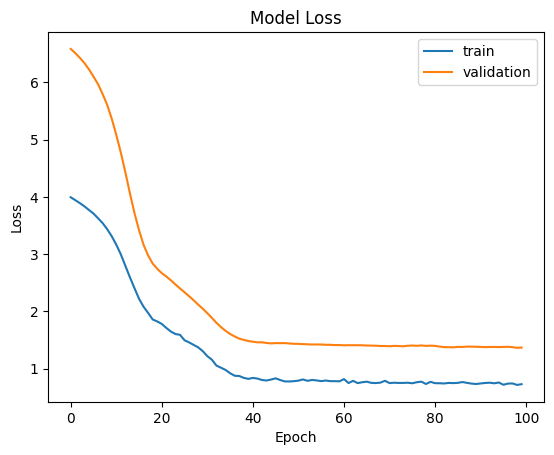

In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Assuming 'train_features' and 'train_labels' are your training datasets
# Reshape features for LSTM input (samples, time steps, features)
train_features_reshaped = train_features.reshape((train_features.shape[0], 1, train_features.shape[1]))

# Model definition
model = Sequential([
    # Bidirectional LSTM layer
    Bidirectional(LSTM(200, return_sequences=True, input_shape=(train_features_reshaped.shape[1], train_features_reshaped.shape[2]))),
    Dropout(0.2),  # Dropout for regularization
    LSTM(100),      # Second LSTM layer
    Dropout(0.2),  # Another Dropout layer
    Dense(10, activation='relu', kernel_regularizer=l2(0.01)),  # Dense layer with L2 regularization
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mean_absolute_error'])



# Model training
history = model.fit(
    train_features_reshaped,
    train_labels,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    # callbacks=[early_stopping, model_checkpoint],
    verbose=2
)


# Model evaluation (assuming 'test_features' and 'test_labels' are your test datasets)
test_features_reshaped = test_features.reshape((test_features.shape[0], 1, test_features.shape[1]))
test_loss, test_mae = model.evaluate(test_features_reshaped, test_labels, verbose=2)

print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Optionally plot the history for loss and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()



In [8]:
# save the model
model.save('river_height_prediction_model.keras')





3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step


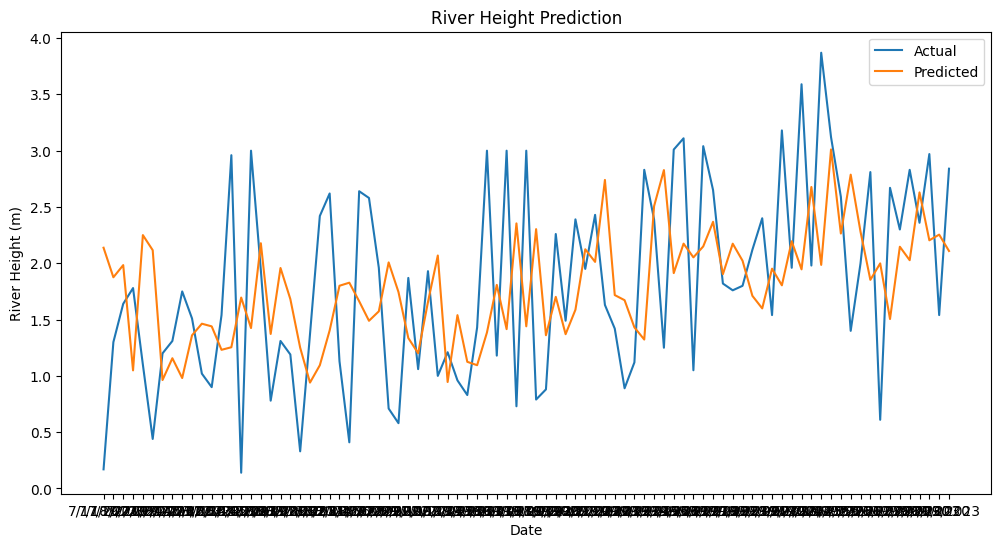

In [9]:
#load the model
from tensorflow.keras.models import load_model

model = load_model('river_height_prediction_model.keras')

# Predictions
predictions = model.predict(test_features_reshaped)

# Plotting the predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['river_height'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.title('River Height Prediction')
plt.xlabel('Date')
plt.ylabel('River Height (m)')
plt.legend()
plt.show()
    

In [13]:
import requests

# URL of the FastAPI endpoint
url = 'http://127.0.0.1:8000/forecast/putupaula/'

# Data to be sent to the API
data = {
    "current_height": 2.5,
    "current_rainfall": 10.0
}

# Make the POST request and store the response
response = requests.post(url, json=data)

# Print the status code and the response data
print(f"Status Code: {response.status_code}")
print("Response Data:", response.json())

Status Code: 200
Response Data: {'predictions': [3.7143733501434326, 3.9162044525146484, 3.949538230895996, 3.9550371170043945, 3.9559433460235596]}
